score DE genes with ssGSEA

# process & score scRNA data from Compass 

In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from utils import *
import joblib
import anndata as ad

In [2]:
out_file_path = './'
data_dir = out_file_path + 'data/compass_scrna/'
out_dir = out_file_path + 'compass_comparison/scrna/'
gene_signature_dir = out_file_path + 'gene_signatures/'

In [3]:
p_thresh = 0.05
logfc_thresh = 0

# 2 score these DE genes for metabolism reactions

In [4]:
de_genes = pd.read_csv(out_dir + 'de_genes_mann_whitney.csv', index_col = 0)
de_genes

,log2FC,x_mean,y_mean,pval,padj
IL22,2.931155,1.937399e+06,1.935570e+04,4.603661e-45,4.229383e-41
PDZK1IP1,1.400808,6.411167e+05,7.501585e+04,6.790474e-32,6.238408e-28
EGFR,1.309958,4.093016e+05,3.946467e+03,2.122886e-31,1.950296e-27
NEBL,1.278267,9.682041e+05,2.404625e+05,3.677411e-14,3.378437e-10
LUM,1.196804,4.003623e+05,2.240333e+04,9.006463e-33,8.274238e-29
...,...,...,...,...,...
VIM,-2.266922,2.709426e+05,2.333774e+06,1.800070e-28,1.653724e-24
CCL20,-2.377385,1.434090e+04,1.207685e+06,7.431471e-26,6.827292e-22
PDPN,-2.965298,2.798759e+04,2.057677e+06,1.243369e-46,1.142283e-42
IL9,-3.198059,9.895097e+03,2.299183e+06,1.191840e-43,1.094943e-39


In [5]:
de_genes[de_genes['padj'] < 0.05]

,log2FC,x_mean,y_mean,pval,padj
IL22,2.931155,1.937399e+06,1.935570e+04,4.603661e-45,4.229383e-41
PDZK1IP1,1.400808,6.411167e+05,7.501585e+04,6.790474e-32,6.238408e-28
EGFR,1.309958,4.093016e+05,3.946467e+03,2.122886e-31,1.950296e-27
NEBL,1.278267,9.682041e+05,2.404625e+05,3.677411e-14,3.378437e-10
LUM,1.196804,4.003623e+05,2.240333e+04,9.006463e-33,8.274238e-29
...,...,...,...,...,...
VIM,-2.266922,2.709426e+05,2.333774e+06,1.800070e-28,1.653724e-24
CCL20,-2.377385,1.434090e+04,1.207685e+06,7.431471e-26,6.827292e-22
PDPN,-2.965298,2.798759e+04,2.057677e+06,1.243369e-46,1.142283e-42
IL9,-3.198059,9.895097e+03,2.299183e+06,1.191840e-43,1.094943e-39


In [25]:
de_genes

,log2FC,x_mean,y_mean,pval,padj
IL22,2.931155,1.937399e+06,1.935570e+04,4.603661e-45,4.229383e-41
PDZK1IP1,1.400808,6.411167e+05,7.501585e+04,6.790474e-32,6.238408e-28
EGFR,1.309958,4.093016e+05,3.946467e+03,2.122886e-31,1.950296e-27
NEBL,1.278267,9.682041e+05,2.404625e+05,3.677411e-14,3.378437e-10
LUM,1.196804,4.003623e+05,2.240333e+04,9.006463e-33,8.274238e-29
...,...,...,...,...,...
VIM,-2.266922,2.709426e+05,2.333774e+06,1.800070e-28,1.653724e-24
CCL20,-2.377385,1.434090e+04,1.207685e+06,7.431471e-26,6.827292e-22
PDPN,-2.965298,2.798759e+04,2.057677e+06,1.243369e-46,1.142283e-42
IL9,-3.198059,9.895097e+03,2.299183e+06,1.191840e-43,1.094943e-39


read in gene signatures

In [6]:
out_filename = gene_signature_dir + 'metabolism_rxn_subsystem.pickle'
subsystem_to_genes = joblib.load(out_filename)
metabolism_sig = {key: [item[0] for item in subsystem_to_genes[key]] for key in subsystem_to_genes}

out_filename = gene_signature_dir + 'metabolism_rxn_reaction.pickle'
reaction_sig_genes = joblib.load(out_filename)
reaction_sig = {k: v[0] for k,v in reaction_sig_genes.items()}

In [7]:
print(len(metabolism_sig.keys()))
for k,v in metabolism_sig.items():
    print(f'{k}: {len(v)}')

81
Fatty acid oxidation: 32
Nucleotide interconversion: 102
Keratan sulfate degradation: 11
Sphingolipid metabolism: 29
Tyrosine metabolism: 34
Keratan sulfate synthesis: 15
Steroid metabolism: 25
Chondroitin synthesis: 30
Tryptophan metabolism: 36
Glycerophospholipid metabolism: 61
Inositol phosphate metabolism: 60
Folate metabolism: 11
Valine, leucine, and isoleucine metabolism: 31
Chondroitin sulfate degradation: 10
Cholesterol metabolism: 22
Arginine and Proline Metabolism: 33
Bile acid synthesis: 9
Fatty acid synthesis: 8
Glycine, serine, alanine and threonine metabolism: 23
Pyrimidine catabolism: 23
Blood group synthesis: 5
Pyruvate metabolism: 32
Aminosugar metabolism: 26
Heparan sulfate degradation: 6
Urea cycle: 17
Purine catabolism: 13
Eicosanoid metabolism: 19
Methionine and cysteine metabolism: 20
Lysine metabolism: 25
Starch and sucrose metabolism: 14
Pentose phosphate pathway: 12
NAD metabolism: 14
Vitamin A metabolism: 15
beta-Alanine metabolism: 21
Triacylglycerol synth

In [8]:
print(len(reaction_sig.keys()))
for k,v in reaction_sig.items():
    print(f'{k}: {len(v)}')

1292
13DAMPPOX: 3
2HBO: 5
2OXOADOXm: 4
34DHOXPEGOX: 6
34DHPHAMT: 1
34DHPLACOX: 4
34DHPLACOX_NADP_: 3
34DHXMANDACOX: 3
34DHXMANDACOX_NADP_: 2
34HPPOR: 1
3AIBTm: 1
3DSPHR: 1
3HAO: 1
3HBCDm: 1
3HKYNAKGAT: 2
3HLYTCL: 1
3HPCOAHYD: 1
3HXKYNOXDA: 2
3M4HDXPAC: 4
3MOX4HOXPGALDOX: 4
3MOX4HOXPGALDOX_NADP_: 4
3MOXTYROX: 2
3NTD7l: 4
3SALACBOXL: 3
3SALATAi: 1
3SALATAim: 1
41R1H2MAE12BOOX: 2
41R2A1H12BOOX: 2
42A12BOOX: 5
4HGLSDm: 1
4HOXPACDOX_NADP_: 4
4NPHSULT: 1
5ADTSTSTERONESULT: 2
5HLTDL: 1
5HOXINDACTO2OX: 1
5HOXINDACTOXm: 3
5HOXINOXDA: 2
5HTRPDOX: 1
5HXKYNDCL: 1
5HXKYNOXDA: 2
A4GALTc: 1
A4GALTg: 1
AACOAT: 1
AACTOOR: 1
AATAi: 1
ABTArm: 1
ABUTD: 1
ACACT10m: 3
ACACT1x: 1
ACACT4p: 1
ACACT5p: 1
ACACT6p: 1
ACACT7p: 1
ACACT8p: 1
ACACT9p: 1
ACCOACm: 1
ACCOAL: 1
ACCOALm: 2
ACGAM2E: 1
ACGAM6PSi: 1
ACGAMK: 1
ACGAMPM: 1
ACGPID: 1
ACGSm: 1
ACHEe: 1
ACNAM9PL: 1
ACNAM9PL2: 1
ACNAMPH: 3
ACOAD10m: 2
ACOAD1fm: 7
ACOAD8m: 1
ACOAD9m: 2
ACOAO7p: 1
ACOATA: 1
ACODA: 1
ACOX22x: 1
ACOX2x: 1
ACP1_FMN_: 4
ACS: 2
ACS2: 2
AC

In [9]:
# read in scRNA data
compass_data_geo = pd.read_csv(data_dir + 'geo_data/raw_counts_from_rpkm.csv', sep = ',', index_col = 0) # this is raw
metadata_geo = pd.read_csv(data_dir + 'geo_data/all_meta.csv')
#samples = list(set([i[:-9] for i in compass_data.columns]))

In [10]:
print(compass_data_geo.shape)
compass_data_geo.head()

(9187, 290)


,SRR2921289,SRR2921321,SRR2921373,SRR2921293,SRR2921400,SRR2921399,SRR2921344,SRR2921409,SRR2921402,SRR2921381,...,SRR2921590,SRR2921624,SRR2921572,SRR2921711,SRR2921614,SRR2921699,SRR2921671,SRR2921633,SRR2921638,SRR2921619
ZFP865,3408.242854,0.000000,0.000000,0.000000,0.000000,22147.187219,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7645.283929,0.000000,0.000000,0.000000,6983.059745,0.000000,0.000000
MED11,40057.837751,226610.302730,69345.841127,140862.782268,40225.608707,9662.545547,209007.845844,29722.491487,132380.973927,40898.045270,...,114948.318531,147938.207298,531685.055525,5717.967335,219665.588633,58536.016473,174638.137684,99196.953898,348460.952877,0.000000
FRMD8,0.000000,36983.924664,0.000316,0.000000,131802.929331,73368.893106,102229.321178,0.000000,32823.507834,10364.231145,...,17435.111258,59353.562816,0.000000,25297.148677,64842.267148,8754.526580,115891.828735,3756.194939,10303.609694,954.806947
BTAF1,3044.076620,247634.101653,133423.828923,64392.850506,26806.666437,305053.648621,1506.051771,138550.182121,296232.246110,56411.326837,...,1530.124403,288545.063326,0.000000,1535.896630,15455.169566,79141.870493,10298.180608,0.000000,0.000000,4787.622342
ADAMTS13,0.000000,2397.368902,20717.937462,598.196367,12333.518928,28262.604027,7510.841655,7136.025003,20871.952261,4571.122277,...,3652.894136,0.000000,0.000000,41183.454524,1228.919312,15931.245086,3628.955841,1245.830001,1865.694547,2529.984915


In [11]:
metadata_geo.head()

,MD_SRX,cell_id,cell_type,NREADS,NALIGNED,geo
0,SRX1435513,SRR2921289,Th17p,1296320,922293,GSM1943112
1,SRX1435545,SRR2921321,Th17p,1320230,941281,GSM1943144
2,SRX1435597,SRR2921373,Th17p,2109040,1149880,GSM1943196
3,SRX1435517,SRR2921293,Th17p,1631870,1183900,GSM1943116
4,SRX1435624,SRR2921400,Th17p,1895830,1292000,GSM1943223


In [12]:
n_genes_total_geo = len(compass_data_geo.index)
n_genes_total_geo

9187

In [13]:
all_bg_genes = list(compass_data_geo.index)

### subsystem scoring

In [14]:
all_genes_geo = list(compass_data_geo.index)
overlapping_terms_geo, n_removed_terms_geo = get_overlapping_met_genes(metabolism_sig, all_genes_geo, verb = False)

Text(0, 0.5, 'frequency')

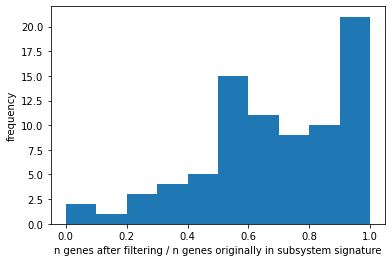

In [15]:
prop_removed_geo = {}
for k,v in n_removed_terms_geo.items():
    prop_removed_geo[k] = (len(metabolism_sig[k]) - v)/len(metabolism_sig[k])
plt.hist(prop_removed_geo.values())
plt.xlabel('n genes after filtering / n genes originally in subsystem signature')
plt.ylabel('frequency')

(0.0, 100.0)

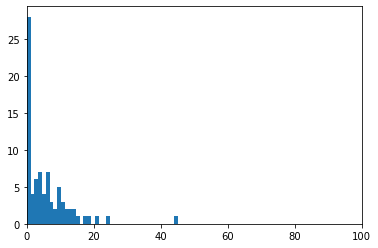

In [16]:
plt.hist(n_removed_terms_geo.values(), bins = 40)
plt.xlim(0,100)

In [19]:
min_prop = 0.5
min_length = 1

In [20]:
overlapping_terms_filter_geo = {}
for k,v in overlapping_terms_geo.items():
    if (len(v) >= min_length) & (prop_removed_geo[k] > min_prop):
        overlapping_terms_filter_geo[k] = v
    else:
        print('removed ' + k)

removed Tyrosine metabolism
removed Steroid metabolism
removed Bile acid synthesis
removed Blood group synthesis
removed Eicosanoid metabolism
removed Vitamin A metabolism
removed Triacylglycerol synthesis
removed Alanine and aspartate metabolism
removed Histidine metabolism
removed Phenylalanine metabolism
removed Transport, extracellular
removed Hyaluronan metabolism
removed Nucleotide salvage pathway
removed Cytochrome metabolism
removed Vitamin B6 metabolism
removed Taurine and hypotaurine metabolism
removed Alkaloid synthesis
removed D-alanine metabolism


In [21]:
len(overlapping_terms_filter_geo)

63

In [75]:
len(overlapping_terms_geo)

81

In [74]:
len(overlapping_terms_filter_geo)

40

In [71]:
len(overlapping_terms_filter_geo)

63

In [39]:
pd.DataFrame.from_dict(overlapping_terms_filter_geo, orient = 'index').transpose().to_csv(out_dir + 'subsystems_filtered.csv')

In [28]:
overlapping_terms_filter_geo

{'Fatty acid oxidation': ['CPT1A',
  'ACSL1',
  'ACADM',
  'ACADS',
  'ACAA1B',
  'ACOX1',
  'EHHADH',
  'HSD17B4',
  'ACSL3',
  'CRAT',
  'ACSL4',
  'CPT2',
  'FASN',
  'ACSL5',
  'CROT',
  'ETFDH',
  'ACSL6',
  'ALDH1L1',
  'LCAT',
  'MLYCD',
  'MCAT',
  'PHYH'],
 'Nucleotide interconversion': ['CMPK1',
  'NME2',
  'NME4',
  'NT5C',
  'NT5E',
  'ENTPD1',
  'NME6',
  'CANT1',
  'NT5C2',
  'NT5C3',
  'ITPA',
  'RRM1',
  'RRM2',
  'RRM2B',
  'NUDT5',
  'ENTPD5',
  'TK2',
  'NT5M',
  'PAPSS1',
  'ENTPD6',
  'BPNT1',
  'ADA',
  'DCK',
  'ENTPD4',
  'NME3',
  'NME7',
  'PDE11A',
  'PDE1A',
  'PDE1B',
  'PDE3B',
  'PNP2',
  'AK2',
  'AK4',
  'ADCY6',
  'ADCY7',
  'NUDT9',
  'ADSL',
  'ADSS',
  'AMPD2',
  'NUDT2',
  'DGUOK',
  'TK1',
  'GMPR2',
  'IMPDH1',
  'IMPDH2',
  'DCTPP1',
  'DTYMK',
  'PDE4B',
  'PDE4C',
  'PDE4D',
  'PDE7A',
  'PDE8A',
  'PDE6D',
  'PDE6G',
  'TYMS',
  'TXNRD1',
  'TXNRD2'],
 'Keratan sulfate degradation': ['CTSA',
  'GLB1',
  'NEU1',
  'HEXA',
  'HEXB',
  'GNS',
  

In [19]:
#pd.Series(overlapping_terms_filter.keys()).to_csv(out_dir + 'subsystem_term_names_geo.csv')

In [52]:
de_genes_ssgsea = de_genes[['log2FC']].copy()
de_genes_ssgsea['t'] = de_genes_ssgsea['log2FC'] * -1
de_genes_ssgsea.columns = ['path', 'non-path']
de_genes_ssgsea.to_csv(out_dir + 'de_genes_format.csv')

In [49]:
an_array = np.array(de_genes_ssgsea)

In [50]:
a_file = open(out_dir + 'de_genes_format.csv', "w")
for row in an_array:
    np.savetxt(a_file, row)

a_file.close()


In [45]:
de_genes_ssgsea

,path,non-path
IL22,2.931155,-2.931155
PDZK1IP1,1.400808,-1.400808
EGFR,1.309958,-1.309958
NEBL,1.278267,-1.278267
LUM,1.196804,-1.196804
...,...,...
VIM,-2.266922,2.266922
CCL20,-2.377385,2.377385
PDPN,-2.965298,2.965298
IL9,-3.198059,3.198059


Text(0.5, 1.0, 'len of terms after filter')

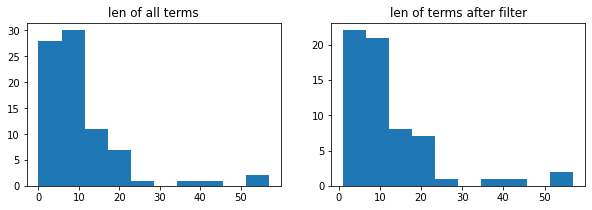

In [60]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist([len(v) for v in overlapping_terms_geo.values()])
axs[1].hist([len(v) for v in overlapping_terms_filter_geo.values()])
axs[0].set_title('len of all terms')
axs[1].set_title('len of terms after filter')

In [61]:
def get_hypergeometric_results_compass_data_mw(de_genes, metabolism, M = n_genes_total_geo, p_thresh = p_thresh, logfc_thresh = logfc_thresh):
    res = {k: {} for k in ['pvn', 'nvp']}
    for key in ['pvn', 'nvp']:
        df = de_genes.copy()
        df = df[df['padj'] < p_thresh]
        if key == 'pvn':
            df = df[df['log2FC'] > logfc_thresh]
        else:
            df = df[df['log2FC'] < (-1 * logfc_thresh)]
            
        df['genes'] = df.index.str.upper()
        df_genes = set(df['genes'])
        N = len(df) # length of DE genes
        for k,v in metabolism.items():
            n = len(v) # number of met genes
            x = len(df_genes.intersection(v))
            pct_overlap = x/(N+n)

            
            p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                        n_genes_picked=N, n_overlap=x)
            res[key][k] = p_val
#             else:
#                 res[key][k] = 1
    return res

In [62]:
def get_hypergeometric_results_compass_data_mw_overlap(de_genes, metabolism, bg_genes = all_bg_genes, M = n_genes_total_geo, p_thresh = p_thresh, logfc_thresh = logfc_thresh):
    res = {k: {} for k in ['pvn', 'nvp']}
    for key in ['pvn', 'nvp']:
        df = de_genes.copy()
        df = df[df['padj'] < p_thresh]
        if key == 'pvn':
            df = df[df['log2FC'] > logfc_thresh]
        else:
            df = df[df['log2FC'] < (-1 * logfc_thresh)]
            
        df['genes'] = df.index.str.upper()
        df_genes = set(df['genes'])
        N = len(df) # length of DE genes
        for k,v in metabolism.items():
            n = len(v) # number of met genes
            x = len(df_genes.intersection(v))
            pct_overlap = x/(N+n)

            overlap_de = x/N
            overlap_bg = len(list(set(all_bg_genes) & set(v))) / M
            #res[key][k] = {'de': overlap_de, 'bg': overlap_bg}
            res[key][k] = None
            if overlap_de != 0:
                res[key][k] = overlap_de/overlap_bg
#             else:
#                 res[key][k] = 1
    r = pd.DataFrame(res)
    r['term'] = r.index
    r = r.reset_index(drop = True)
    return r

In [63]:
def format_hypergeom_res(res):
    res_df = pd.DataFrame.from_dict(res)
    res_df['term'] = res_df.index
    res_df['padj_pvn'] = adjust_p_value_bh(res_df['pvn'].values)
    res_df['padj_nvp'] = adjust_p_value_bh(res_df['nvp'].values)
    res_df['q_pvn'] = adjust_p_value_qval(res_df['pvn'].values,pi_0=None)
    res_df['q_nvp'] = adjust_p_value_qval(res_df['nvp'].values,pi_0=None)
    
    cols_pvn = ['pvn', 'term', 'padj_pvn', 'q_pvn']
    res_df_format = res_df[cols_pvn].reset_index(drop = True).copy()
    res_df_format.columns = ['p', 'term', 'padj', 'q']
    res_df_format = res_df_format[['term', 'p', 'padj', 'q']]
    res_pvn = res_df_format.copy()
    
    cols_nvp = ['nvp', 'term', 'padj_nvp', 'q_nvp']
    res_df_format = res_df[cols_nvp].reset_index(drop = True).copy()
    res_df_format.columns = ['p', 'term', 'padj', 'q']
    res_df_format = res_df_format[['term', 'p', 'padj', 'q']]
    res_nvp = res_df_format.copy()
    
    return res_pvn, res_nvp

In [64]:
r2 = get_hypergeometric_results_compass_data_mw_overlap(de_genes, overlapping_terms_filter_geo)
r2.to_csv(out_dir + 'results_Th17n_v_p_compass_rxns_mw_effect_size_2.csv')

In [68]:
res_pvn_all_geo_2, res_nvp_all_geo_2 = format_hypergeom_res(get_hypergeometric_results_compass_data_mw(de_genes, overlapping_terms_filter_geo))

In [69]:
# res_nvp_all_geo_2.to_csv(out_dir + 'results_Th17n_v_p_compass_rxns_mw_2.csv')
# res_pvn_all_geo_2.to_csv(out_dir + 'results_Th17p_v_n_compass_rxns_mw_2.csv')

In [24]:
res_pvn_all_geo[res_pvn_all_geo['p'] < 1].sort_values('p')

,term,p,padj,q
21,Purine synthesis,0.102497,1.0,1.0
6,Fatty acid synthesis,0.149751,1.0,1.0
1,Keratan sulfate synthesis,0.257324,1.0,1.0
12,Selenoamino acid metabolism,0.296456,1.0,1.0
9,Methionine and cysteine metabolism,0.351336,1.0,1.0
10,Lysine metabolism,0.401952,1.0,1.0
7,Aminosugar metabolism,0.448632,1.0,1.0
4,"Valine, leucine, and isoleucine metabolism",0.531385,1.0,1.0
2,Inositol phosphate metabolism,0.704569,1.0,1.0
23,Oxidative phosphorylation,0.768671,1.0,1.0


In [25]:
res_nvp_all_geo[res_nvp_all_geo['p'] < 1].sort_values('p')

,term,p,padj,q
38,N-glycan synthesis,0.124379,1.0,1.0
20,Heme synthesis,0.180659,1.0,1.0
1,Keratan sulfate synthesis,0.306082,1.0,1.0
36,"Transport, lysosomal",0.431582,1.0,1.0
10,Lysine metabolism,0.468168,1.0,1.0
7,Aminosugar metabolism,0.518692,1.0,1.0


In [177]:
r_geo = get_hypergeometric_results_compass_data_mw(de_genes, overlapping_terms_filter_geo)
#pd.DataFrame.from_dict(r_geo)

(0.0, 1.0)

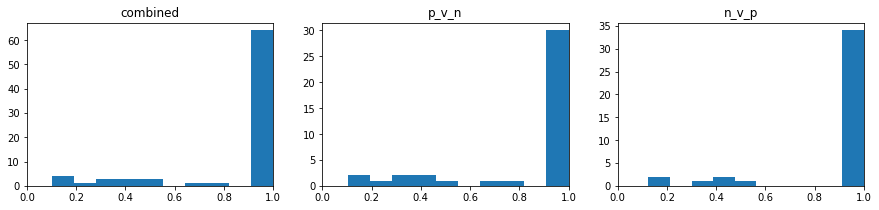

In [178]:
# combined
fig, axs = plt.subplots(1,3, figsize = (15,3))
axs[0].hist([i for s in [r_geo[k].values() for k in r_geo.keys()] for i in s])
axs[0].set_title('combined')
axs[1].hist(res_pvn_all_geo['p'])
axs[1].set_title('p_v_n')
axs[2].hist(res_nvp_all_geo['p'])
axs[2].set_title('n_v_p')
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)

# reaction scoring

In [179]:
all_genes_geo = list(compass_data_geo.index)
overlapping_terms_rxn_geo, n_removed_terms_rxn_geo = get_overlapping_met_genes(reaction_sig, all_genes_geo, verb = False)

(array([274.,   2.,   3.,  65.,   5., 126.,  26.,  60.,  21., 710.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

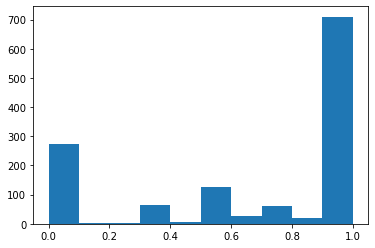

In [180]:
prop_removed_rxn_geo = {}
for k,v in n_removed_terms_rxn_geo.items():
    prop_removed_rxn_geo[k] = (len(reaction_sig[k]) - v)/len(reaction_sig[k])
plt.hist(prop_removed_rxn_geo.values())

(array([708., 384., 135.,  40.,   7.,   5.,   5.,   2.,   5.,   1.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

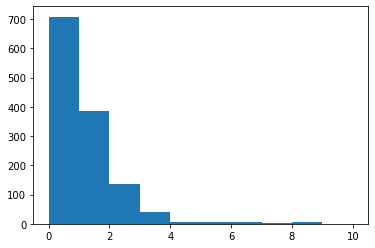

In [181]:
plt.hist(n_removed_terms_rxn_geo.values(), bins = 10)

In [182]:
min_prop = 0.7
min_length = 1

overlapping_terms_filter_rxn_geo = {}
for k,v in overlapping_terms_rxn_geo.items():
    if (len(v) >= min_length) & (prop_removed_rxn_geo[k] > min_prop):
        overlapping_terms_filter_rxn_geo[k] = v

Text(0.5, 1.0, 'len of terms after filter')

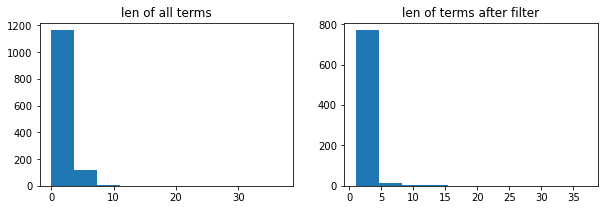

In [183]:
fig, axs = plt.subplots(1,2, figsize = (10,3))
axs[0].hist([len(v) for v in overlapping_terms_rxn_geo.values()])
axs[1].hist([len(v) for v in overlapping_terms_filter_rxn_geo.values()])
axs[0].set_title('len of all terms')
axs[1].set_title('len of terms after filter')

In [184]:
print(len(overlapping_terms_rxn_geo.keys()))

1292


In [185]:
print(len(overlapping_terms_filter_rxn_geo.keys()))

791


In [186]:
res_pvn_all_rxn_geo, res_nvp_all_rxn_geo = format_hypergeom_res(get_hypergeometric_results_compass_data_mw(de_genes, overlapping_terms_filter_rxn_geo))

In [188]:
# res_nvp_all_rxn_geo.to_csv(out_dir + 'results_Th17n_v_p_compass_rxns_mw_rxn.csv')
# res_pvn_all_rxn_geo.to_csv(out_dir + 'results_Th17p_v_n_compass_rxns_mw_rxn.csv')

In [211]:
res_nvp_all_rxn_geo[res_nvp_all_rxn_geo['p'] < 1]

,term,p,padj,q
43,ADK1m,0.064247,1.000000,1.000000
73,ATPasel,0.431582,1.000000,1.000000
105,CPPPGO,0.032655,1.000000,1.000000
192,FACOAL150,0.094810,1.000000,1.000000
193,FACOAL160i,0.124379,1.000000,1.000000
194,FACOAL170,0.094810,1.000000,1.000000
198,FACOAL181i,0.094810,1.000000,1.000000
199,FACOAL1821,0.094810,1.000000,1.000000
201,FACOAL1831,0.152985,1.000000,1.000000
206,FACOAL204,0.094810,1.000000,1.000000


In [213]:
res_pvn_all_rxn_geo[res_pvn_all_rxn_geo['p']  < 1]

,term,p,padj,q
23,ACGAM6PSi,0.026668,1.0,1.0
45,ADPGLC,0.026668,1.0,1.0
46,ADPMAN,0.026668,1.0,1.0
47,ADPRDP,0.026668,1.0,1.0
49,ADSL1,0.026668,1.0,1.0
50,ADSL2,0.026668,1.0,1.0
52,AGPAT1,0.149751,1.0,1.0
116,CYSTGL,0.026668,1.0,1.0
201,FACOAL1831,0.126442,1.0,1.0
267,FAS100COA,0.077898,1.0,1.0


(0.0, 1.0)

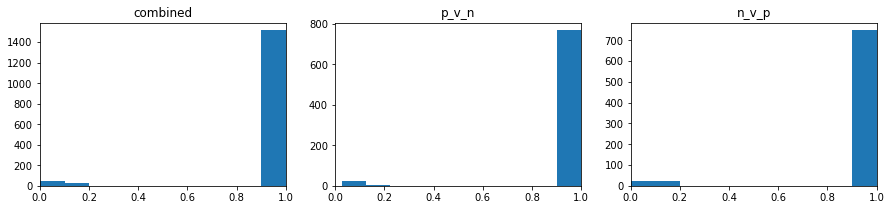

In [193]:
# combined
r_geo_rxn = get_hypergeometric_results_compass_data_mw(de_genes, overlapping_terms_filter_rxn_geo)
fig, axs = plt.subplots(1,3, figsize = (15,3))
axs[0].hist([i for s in [r_geo_rxn[k].values() for k in r_geo_rxn.keys()] for i in s])
axs[0].set_title('combined')
axs[1].hist(res_pvn_all_rxn_geo['p'])
axs[1].set_title('p_v_n')
axs[2].hist(res_nvp_all_rxn_geo['p'])
axs[2].set_title('n_v_p')
axs[0].set_xlim(0,1)
axs[1].set_xlim(0,1)
axs[2].set_xlim(0,1)

# compare the similarity between differently derived DE genes

In [194]:
de_genes_limma = pd.read_csv(out_dir + 'de_genes_toptable_limma.csv', index_col = 0)
de_genes_deseq = pd.read_csv(out_dir + 'deseq_genes_Th17p_vs_Th17n_round_from_RPKM_geo.csv', index_col = 0)
de_genes_mw = pd.read_csv(out_dir + 'de_genes_mann_whitney.csv', index_col = 0)
de_genes_bulk = pd.read_csv(out_dir + '../../data/th_data/deseq_genes_th_collapse.csv', index_col =0 )

In [195]:
print(de_genes_limma.shape)
de_genes_limma.head()

(8813, 6)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
AQP3,-6.300183,3.298555,-37.147549,6.206266e-114,5.469582e-110,247.927181
MAF,-5.521903,3.369200,-33.797761,4.946358e-104,2.179613e-100,225.645859
PDPN,-5.852255,3.395294,-29.124095,3.185392e-89,9.357620e-86,192.183156
LGALS1,-1.840688,10.117213,-22.776495,3.051426e-67,6.723055e-64,142.281577
TMEM176B,-6.677593,3.523027,-22.178156,4.545083e-65,8.011164e-62,137.337013


In [199]:
print(de_genes_mw.shape)
de_genes_mw.head()
de_genes_mw['log2FoldChange'] = de_genes_mw['log2FC']

(795, 5)


In [198]:
print(de_genes_bulk.shape)
de_genes_bulk.head()

(20817, 6)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0610007P14RIK,1893.142746,-0.146718,0.095478,-1.536671,0.124374,0.342944
0610009B22RIK,172.136271,0.242626,0.247879,0.978806,0.327676,0.613254
0610009L18RIK,6.756630,-0.736257,1.213508,-0.606718,0.544038,0.780532
0610009O20RIK,391.979993,-0.111494,0.175432,-0.635541,0.525075,0.770315
0610010F05RIK,51.101938,-0.050850,0.453262,-0.112186,0.910676,0.963730


In [200]:
de_genes_sig = {}
de_genes_sig['limma'] = de_genes_limma[de_genes_limma['adj.P.Val'] < p_thresh].copy()
de_genes_sig['limma']['log2FoldChange'] = de_genes_sig['limma']['logFC']
de_genes_sig['mw'] = de_genes_mw[de_genes_mw['padj'] < p_thresh]
de_genes_sig['bulk'] = de_genes_bulk[de_genes_bulk['padj'] < p_thresh]

In [201]:
pvn = {k: set(v[v['log2FoldChange'] > logfc_thresh].index) for k,v in de_genes_sig.items()}
nvp = {k: set(v[v['log2FoldChange'] < logfc_thresh].index) for k,v in de_genes_sig.items()}

In [202]:
def get_n_overlap(de_d):
    keys = list(de_d.keys())
    all_overlap = len(set(de_d[keys[0]]) & set(de_d[keys[1]]) & set(de_d[keys[2]]))
    overlap_01 = len(set(de_d[keys[0]]) & set(de_d[keys[1]])) - all_overlap
    overlap_12 = len(set(de_d[keys[1]]) & set(de_d[keys[2]])) - all_overlap
    overlap_02 = len(set(de_d[keys[0]]) & set(de_d[keys[2]])) - all_overlap
  
    only_0 = len(de_d[keys[0]]) - all_overlap - overlap_01 - overlap_02
    only_1 = len(de_d[keys[1]]) - all_overlap - overlap_01 - overlap_12
    only_2 = len(de_d[keys[2]]) - all_overlap - overlap_02 - overlap_12
    return (only_0, only_1, overlap_01, only_2, overlap_02, overlap_12, all_overlap), (keys)

In [203]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles

In [204]:
pvn_overlap = get_n_overlap(pvn)
nvp_overlap = get_n_overlap(nvp)

In [205]:
pvn_overlap

((600, 20, 66, 636, 202, 9, 150), ['limma', 'mw', 'bulk'])

Text(0.5, 1.0, 'up in Th17p')

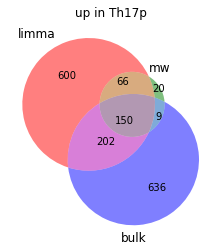

In [206]:
venn3(subsets = pvn_overlap[0], set_labels = pvn_overlap[1], alpha = 0.5)
plt.title('up in Th17p')

Text(0.5, 1.0, 'up in Th17n')

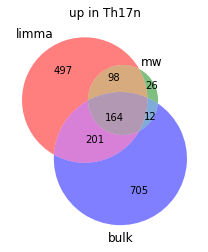

In [207]:
venn3(subsets = nvp_overlap[0], set_labels = nvp_overlap[1], alpha = 0.5)
plt.title('up in Th17n')

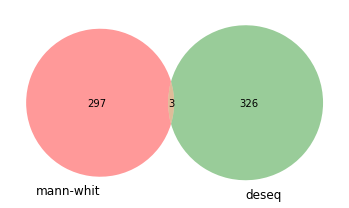

In [208]:
venn2(path_overlap[0], set_labels = path_overlap[1])

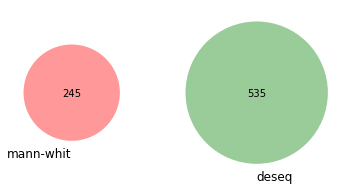

In [209]:
venn2(non_path_overlap[0], set_labels = non_path_overlap[1])